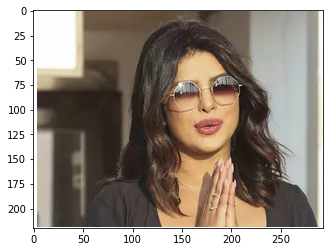

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("crush.PNG")
plt.imshow(img)
plt.show()           
            

In [2]:
import numpy
            
def convolution2D(X,H,moitie):
    s = X.shape
    py = (H.shape[0]-1)//2
    px = (H.shape[1]-1)//2
    Y = X.copy()
    if moitie:
        imax = s[1]//2
    else:
        imax = s[1]-px
    for i in range(0,imax):
        for j in range(py,s[0]-py):
            somme = 0.0
            for k in range(-px,px+1):
                for l in range(-py,py+1):
                    somme += X[j+l][i+k]*H[l+py][k+px]
            Y[j][i] = somme
    return Y

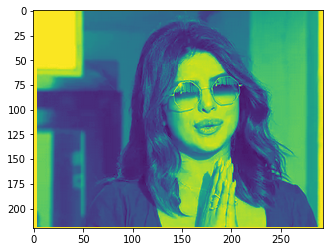

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
# Filtre moyen

import matplotlib.image as mpimg
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
X1 = red*1.0
plt.imshow(X1)

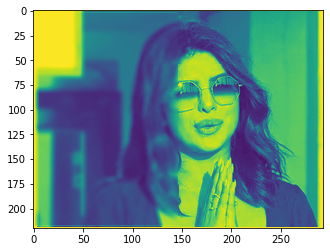

In [4]:
h = np.ones((5,5))*1.0/25
Y = convolution2D(X1,h,True)
plt.imshow(Y)

In [5]:
# Filtre Gaussien
import math
def filtreGaussien(P):
    epsilon = 0.05
    sigma = P*1.0/math.sqrt(-2*math.log(epsilon))
    h = numpy.zeros((2*P+1,2*P+1))
    som = 0
    for m in range(-P,P+1):
        for n in range(-P,P+1):
            h[m+P][n+P] = math.exp(-(n*n+m*m)/(2*sigma*sigma))
            som += h[m+P][n+P]
    h = h/som
    return h

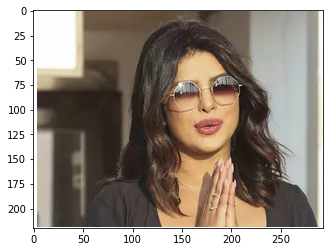

In [6]:
X2 = np.array(img)
plt.imshow(X2)

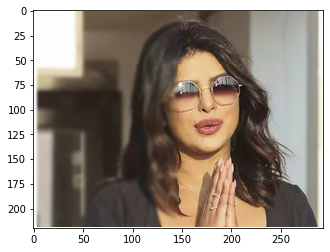

In [7]:
h = filtreGaussien(3)             
Y = convolution2D(X2,h,True)
plt.imshow(Y)

In [23]:
# Filtre median
import numpy as np
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = (temp[len(temp) // 2]).all()
            temp = []
    return data_final



In [ ]:
import matplotlib.image as mpimg

def main():
    img = mpimg.imread("crush.PNG")
    arr = np.array(img)
    removed_noise = median_filter(arr, 3) 
    img = Image.fromarray(removed_noise)
    img.show()


main()

In [ ]:
# Filtre flou
import matplotlib.image as mpimg
import numpy as np
import random
def convolution2D (img, matrice):
    (hauteur, largeur) = (img.shape[0], img.shape[1])
    img_conv = np.zeros((hauteur, largeur))
    for x in range(1, hauteur-1):
        for y in range(1, largeur-1):
            img_conv[x,y] = np.dot(matrice,
            img [x-1:x+2 , y-1:y+2 , 0])
    return img_conv


In [ ]:
img = mpimg.imread("crush.PNG")
img_flou = convolution2D( img, [[1/8,1/8,1/8],[1/8,0,1/8],[1/8,1/8,1/8]])
plt.imshow(img_flou)

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("crush.PNG")
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
array=red*1.0
plt.imshow(array,cmap="gray")
             